In [1]:
import numpy as np
import pandas as pd

In [3]:
!ls '/content/train.csv'

/content/train.csv


In [4]:
df = pd.read_csv('/content/train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df.shape

(2000, 21)

In [ ]:
#delete illegal and useless data (NULL values and outliers)
df.dropna()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


to make sure there is no null.

In [ ]:
nullCount = df.isnull().sum()
nullCount

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

to omit outliers

In [ ]:
df.shape

(2000, 21)

In [8]:
columns = ["battery_power", "clock_speed", "fc", "int_memory", "m_dep", 
           "mobile_wt", "n_cores", "pc", "px_height", "px_width","ram",
           "sc_h", "sc_w", "talk_time"]

for column in columns :
    
    upper = df[column].mean() + 3*df[column].std()
    lower = df[column].mean() - 3*df[column].std()
    
    df = df[(df[column]<upper) & (df[column]>lower)]

In [9]:
df.shape

(1988, 21)

In [11]:
df.duplicated().any()

False

In [13]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,...,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.00000,1988.000000
mean,1237.593058,0.495473,1.522133,0.509054,4.226358,0.520624,32.089034,0.502012,140.159457,4.524145,...,643.926559,1251.535714,2126.544266,12.308350,5.771630,11.014588,0.760563,0.502515,0.50503,1.501509
std,439.498835,0.500105,0.816811,0.500044,4.220051,0.499700,18.128175,0.288438,35.361078,2.289980,...,442.961039,432.086772,1084.186322,4.215626,4.361399,5.459398,0.426847,0.500119,0.50010,1.118314
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000
25%,851.000000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.000000,874.750000,1210.750000,9.000000,2.000000,6.000000,1.000000,0.000000,0.00000,1.000000
50%,1225.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.00000,2.000000
75%,1615.000000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,945.250000,1632.250000,3066.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.00000,3.000000
max,1998.000000,1.000000,3.000000,1.000000,17.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.00000,3.000000


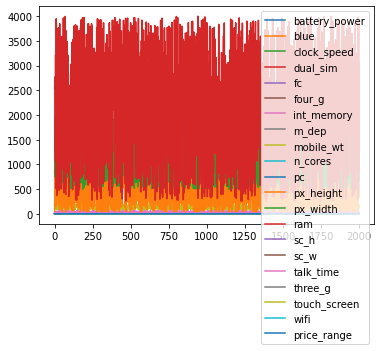

In [17]:
pl = df.plot()
pl